# Minecraft - DSCI 100 
###### Name:  Alycia M. 
###### Student Number: 92941665

In [1]:
# loading packages 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction 

Video games have evolved beyond entertainment into rich environments for behavioral research. As players interact within virtual worlds, they leave data that offer researchers opportunities to study human behavior and engagement patterns. 

Minecraft with millions of users worldwide, is particularly popular for such studies due to its open-ended gameplay and broad appeal across age groups.

At the University of British Columbia (UBC), a research team led by Dr. Frank Wood has set up a Minecraft server to collect data by 
recoridng players' actions as they navigate through the world all in which is to investigate how people play games and what factors influence their continued participation. However, running such a server is resource-intensive. It requires software licenses, robust hardware, and recruitment efforts to ensure enough players contribute meaningful data. To make this sustainable, the team is interested in identifying which types of players are most likely to stay engaged.

To aid in their work, will be answering the 
### Question: 
Can we predict whether a Minecraft player will subscribe based on their gender, age and hours played?




Analysis with be examined through player data set and session data set. 

## Analysis on Player Data Set

In [4]:
players <- read_csv("players.csv")
head(players,10)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In the player data set, it showcases  behavior and personal demographic information. It provides 7 variables in whch include : 

1. experience:
- in character
- showcases player skill level is a pro, veteran, amateur or regular.

2.  subscribe
- is logical
- indicates wheter or not the player is subscribed through true or false

3. hashedEmail
- in character
- An anonymized unique identifier for each player

4. played_hours
- in decimals
- Total hours the player has spent in the game

5. name
- in character
- Player's first name

6. gender
- in character
- player's gender

7. Age
- in decimals
- player's value

and there are 196 observations. 

## Analysis on Session Data Set

In [5]:
session <- read_csv("sessions.csv")
head(session,10)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In the session data set, it captures detailed gameplay activity of an indivual. It contains 5 variables: 

1. hashedEmail
- in character
- An anonymized unique ID that links each session to a player

2. start_time
- in character
- 	Human-readable timestamp showing when the session began

3. end_time
-  in character
- Human-readable timestamp showing when the session ended

4. original_start_time
- in decimals
- timestamp when the session started

5. original_end_time
- in decimals
- timestamp when the session ended

and there are 1535 observations.

### Issues 

There are 2 data sets, in which would be beneficial to use both for the analysis. There are also more observation in the session data set compared to the player data set. Therefore, must find a way to combine the 2 data sets by hashed email and summarize session count and combine all required variables into one data set. 

Additionally, as gender is a character variable, need to adjust it so that it is suitable for the model and can be scaled to the other predictors as it can lead to an unbalance and unaccurate model.

----------------

## Methods & Results 

#### Wrangling data - Combining all data into one data set

In [7]:
session_counts <- session |> 
  group_by(hashedEmail) |> 
  summarize(session_count = n())

players_sorted <- players |> 
  arrange(hashedEmail)

session_counts_sorted <- session_counts |> 
  arrange(hashedEmail)

session_col <- session_counts_sorted |> 
  select(session_count)

players_trimmed <- players_sorted |> 
  slice(1:nrow(session_counts_sorted))

complete <- bind_cols(players_trimmed, session_col)

head(complete, 10)


experience,subscribe,hashedEmail,played_hours,name,gender,Age,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Regular,TRUE,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1.5,Isaac,Male,20,2
Veteran,TRUE,055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,0.0,Frankie,Male,17,1
Pro,FALSE,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.4,Lyra,Male,21,1
Beginner,TRUE,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0.1,Osiris,Male,17,13
Regular,TRUE,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,5.6,Winslow,Male,17,2
Pro,TRUE,0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1.0,Knox,Male,17,1
Veteran,FALSE,11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,0.1,Callum,Male,19,1
Amateur,TRUE,119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.7,Hugo,Female,21,41
Amateur,FALSE,11bf6125c4264b3a8f3bffa57b33bd598e2ea1ecd6331ad3bc54aa88e22db035,0.0,Olivia,Female,23,1


#### Note: 
From the session data set, end time and start time have been removed from the combined data set as durations have been accounted for in the players data set through the variable played hours.

### Determining the Relationship in Respect to Subscription through Bar Graphs

In [8]:
### cleaning data as classficatioin must be in factor form
complete <- complete |> 
  mutate(
    subscribe = as_factor(subscribe)
    #experience = as_factor(experience),
    #gender= as_factor(gender),
    #played_hours= as_factor(played_hours),
    #Age= as_factor(Age)
  ) |> select(-hashedEmail	, -name) |> filter(!is.na(Age))

# converting gender to integer values 
final <- complete |> mutate(gender = as.integer(factor(gender)))

Warning message in geom_bar(position = "dodge", bins = 30):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(position = "dodge", bins = 30):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(position = "dodge", bins = 30):
“Ignoring unknown parameters: `bins`”


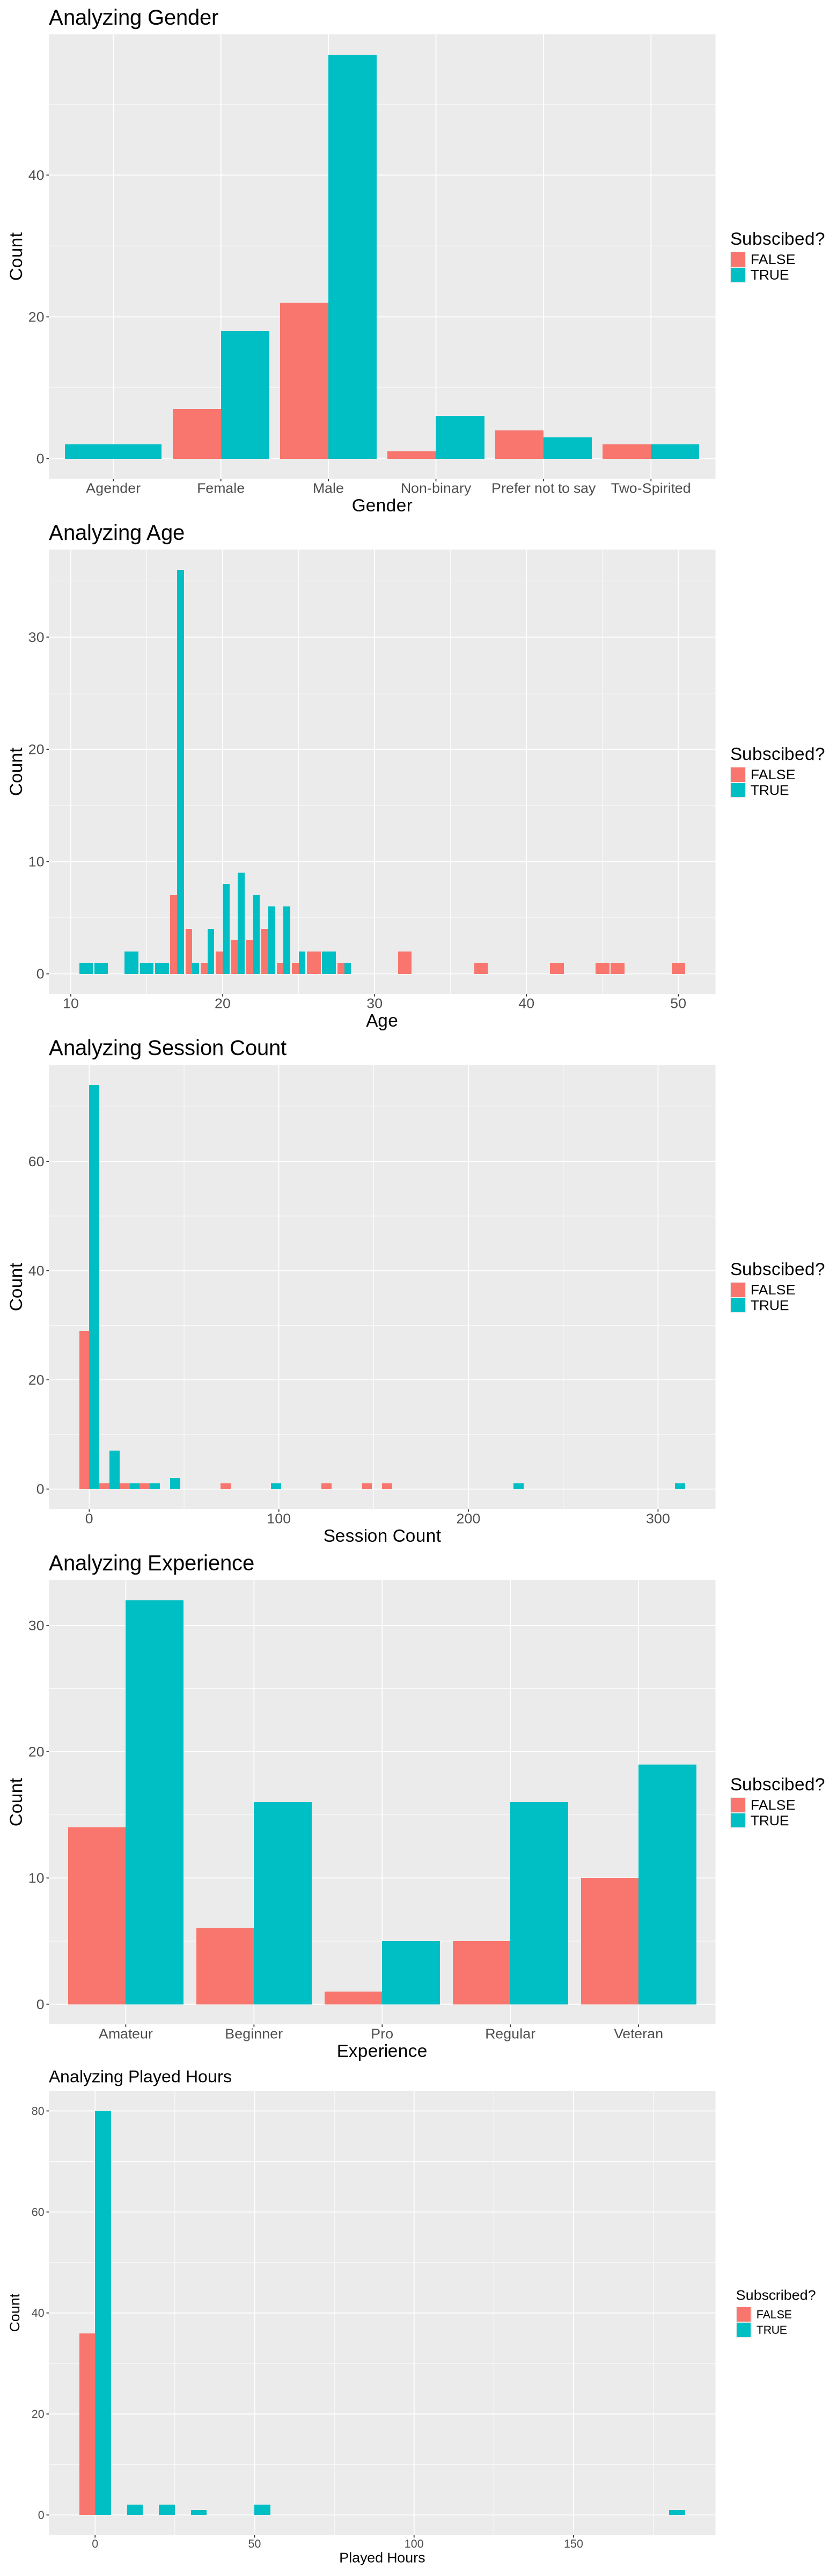

In [9]:
# plotting gender and expereince

options(repr.plot.height=40, repr.plot.width =13)

Experience <- ggplot(complete, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge", bins = 30) + labs( x = "Experience" , y= "Count", fill= "Subscibed?", title= "Analyzing Experience")+ theme(text = element_text(size = 20))

Gender <-   ggplot(complete, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge", bins = 30) + labs( x = "Gender" , y= "Count", fill= "Subscibed?", title= "Analyzing Gender")+ theme(text = element_text(size = 20))


age <-  ggplot(complete, aes(x = Age, fill = subscribe)) +
  geom_bar(position = "dodge", bins = 30) + labs( x = "Age" , y= "Count", fill= "Subscibed?", title= "Analyzing Age ")+ theme(text = element_text(size = 20))

sessioncount <- ggplot(complete, aes(x = session_count, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 30) + labs( x = "Session Count" , y= "Count", fill= "Subscibed?", title= "Analyzing Session Count ")+ theme(text = element_text(size = 20))

playedhours <- ggplot(complete, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "dodge", binwidth = 10) +
  labs(
    x = "Played Hours",
    y = "Count",
    fill = "Subscribed?",
    title = "Analyzing Played Hours"
  ) +
  theme(text = element_text(size = 16))


Gender/ age  / sessioncount/ Experience / playedhours
# will use  looks like it does matter men have the most likely. non bindary and agender

###### Figure 1. All variables presented as bar graphs in respect to subscription

### Interpretation 

All graphs have been presented as bar graphs to provide a clear, organized, and easily interpretable visualization. Each variable is displayed along the x-axis, while the y-axis represents the count of unique players associated with each variable. Additionally as indicated through the lengend, orange bars represent nonsubscibers and blue represent subscribers. 

Through the complete data set, hashedEmail and Name were not plotted, as each observation has their own Name and hashedEmail. Therefore plotting the data would be redudant, time consuming and unnessary as there would not be an observable trend. 

##### Gender 
Through the bar graph, it is observed that gender may influence whether the gamers are more likely to be subscribed. For example, those that are non-binary are more likley to be subscibed comapred to those that prefer not to say. Therefore this may be a good predictor to include. 

##### Age
By observing the bar graph, age may have a factor in subscription. For example, past 30 gamers are less likley to be subscribed and gamers under the age of 17 are more likley to be subscribed. Therefore, age may be a good predictor in the model.  

##### Session Count 
By observing the graph, session count may not be a good predictor to include in the model. There is no trend in the session count and whether the gamer is subscribed. 

##### Experience
Through this graph, it appears that for each experience, the ratio of non-subscriber to subscribers are very similar as it is almost like a 1:3 or 1:2 ratio. Therefore, the different experiences may not be a significant predictor to determine subscribers. 

##### Played Hours 
Through the graph, played hours may be a strong indicator as past a certain threshold (approximately 10 hours) in which all are subscribers and can be valuable to add to the model. 



-----